# Метод K-ближайших соседей

***
## Считывание датасета

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Прописываем путь к нашему датасету

In [3]:
PATH = "../data/knn/";
data = "dataset.txt";

Функция `createDateSet` считывает данные с файла `data` и переводит их в формат списков.

Далее загружаем наш датасет и выводим одну из цифр через `matplotlib`.

In [4]:
def createDataSet(ptxt: str = f'{PATH}{data}') -> list:
    labels = []
    digits = []
    with open(ptxt) as f:
        for line in f:
            digits.append([float(x) for x in line.split()[:-10]])
            labels.append(line.split()[-10:].index('1'))
    return np.array(digits), np.array(labels)
        

In [5]:
digits, labels = createDataSet()

***
## Знакомимся с датасетом поближе

In [6]:
labels

array([0, 0, 0, ..., 9, 9, 9])

In [7]:
len(digits), len(labels), digits.shape, labels.shape

(1593, 1593, (1593, 256), (1593,))

С помощью `pandas` смотрим на количество цифр в нашем датасете. Как видно ниже меньше всего 8ок, а больше всего 1ц. Но разница между в количестве между 8ми и 1ми всего лишь 7. Так что можно считать, что всех цифр поровну

In [8]:
df = pd.DataFrame(labels)
df.columns = ['label']

In [9]:
df['label'].value_counts()

1    162
6    161
4    161
0    161
5    159
3    159
2    159
9    158
7    158
8    155
Name: label, dtype: int64

Случайная цифра из датасета

(5, <matplotlib.image.AxesImage at 0x274e8c76e48>)

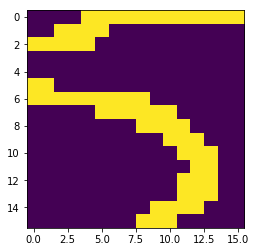

In [10]:
img = digits[100].reshape(16, 16)
labels[100], plt.imshow(img)

***
## Строим модель

Импортируем `scikit-learn`

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Создаем тренеровочную и тестовую выборку с помощью функции `train_test_split`

In [12]:
x_tr, x_test, y_tr, y_test = train_test_split(digits, labels, test_size=0.20, random_state=42)

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size=0.20, random_state=42)

Теперь создаем нашу модель с помощью класса `KNeighborsClassifier`. Ставим окно в 14 ближайщих соседей. Обучаем нашу модель с помощью метода `fit`.

In [14]:
model = KNeighborsClassifier()

In [15]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Импортируем функцию `accuracy_score` для оценки качества нашей модели. Проверяем нашу модель на тестовой выборке. Точность: 89-91% 

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_val, model.predict(x_val))

0.8705882352941177

In [18]:
??accuracy_score

Предиктим цифру, которую рисовали выше. Получаем 5. Ответ верный.

In [19]:
model.predict(digits[100][None])

array([5])

Теперь посмотрим на наши результаты получше, построим матрицу несоответствия. Импортируем модуль `ConfusionMatrix` из `pandas_ml` с помощью него построим и выведем нашу матрицу.

Видно что подавляющее большинство цифр распознается верно.

In [20]:
from pandas_ml import ConfusionMatrix

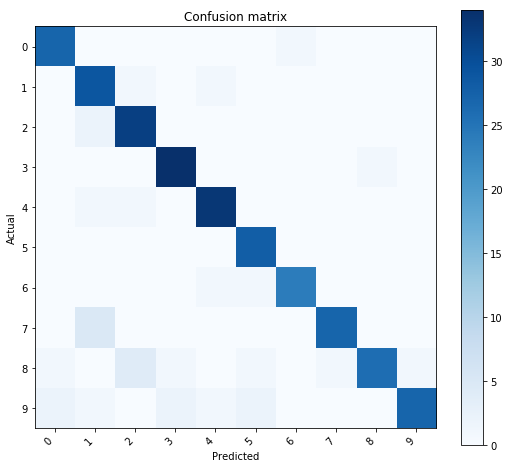

In [21]:
y_pred = model.predict(x_test)
cm = ConfusionMatrix(y_test, y_pred)
cm.plot(cmap=plt.cm.Blues)

In [22]:
cm

Predicted   0   1   2   3   4   5   6   7   8   9  __all__
Actual                                                    
0          27   0   0   0   0   0   1   0   0   0       28
1           0  29   1   0   1   0   0   0   0   0       31
2           0   2  32   0   0   0   0   0   0   0       34
3           0   0   0  34   0   0   0   0   1   0       35
4           0   1   1   0  33   0   0   0   0   0       35
5           0   0   0   0   0  28   0   0   0   0       28
6           0   0   0   0   1   1  24   0   0   0       26
7           0   5   0   0   0   0   0  27   0   0       32
8           1   0   4   1   0   1   0   1  26   1       35
9           2   1   0   2   1   2   0   0   0  27       35
__all__    30  38  38  37  36  32  25  28  27  28      319

***
## Гиперпараметры

Теперь улучшим модель. Подберем такие параметры, чтобы наша точность была наилучшей. Мы будем подбирать `n_neighbors`, `metric` и `weights`.

Ниже импортируем класс `GridSearchCV`. Задаем словарь с параметрами `params`. Из этих параметров мы выберем те, которые дадут наилучший результат в распозновании цифр.

In [1]:
from sklearn.model_selection import GridSearchCV

In [24]:
params = {"n_neighbors": np.arange(1, 31, 2), 
          "metric": ["euclidean", "cityblock", "chebyshev"],
          "weights": ["uniform","distance"]}

Создаем объект `grid` класса `GridSearchCV` и передаем туда наши параметры. Обучаем его и находим наилучшие параметры и так же смотрим нашу точность на них.

In [25]:
grid = GridSearchCV(model, params)

In [26]:
grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]), 'metric': ['euclidean', 'cityblock', 'chebyshev'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [27]:
grid.best_params_

{'metric': 'cityblock', 'n_neighbors': 5, 'weights': 'distance'}

In [28]:
acc = grid.score(x_val, y_val)
acc

0.8862745098039215

In [29]:
acc = grid.score(x_test, y_test)
acc

0.9028213166144201

In [30]:
len(x_train), len(x_val), len(x_test)

(1019, 255, 319)

Добившись такого результата снова постром матрицу несоответствия.

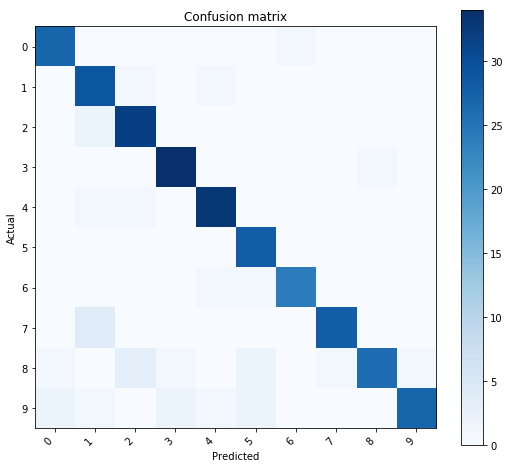

In [31]:
y_pred = grid.predict(x_test)
cm = ConfusionMatrix(y_test, y_pred)
cm.plot(cmap=plt.cm.Blues)

In [32]:
cm.stats()

C:\Users\Fridge\Anaconda3\envs\fastai\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
C:\Users\Fridge\Anaconda3\envs\fastai\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:346: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.LRP) / self.LRN)


OrderedDict([('cm', Predicted   0   1   2   3   4   5   6   7   8   9  __all__
              Actual                                                    
              0          27   0   0   0   0   0   1   0   0   0       28
              1           0  29   1   0   1   0   0   0   0   0       31
              2           0   2  32   0   0   0   0   0   0   0       34
              3           0   0   0  34   0   0   0   0   1   0       35
              4           0   1   1   0  33   0   0   0   0   0       35
              5           0   0   0   0   0  28   0   0   0   0       28
              6           0   0   0   0   1   1  24   0   0   0       26
              7           0   4   0   0   0   0   0  28   0   0       32
              8           1   0   3   1   0   2   0   1  26   1       35
              9           2   1   0   2   1   2   0   0   0  27       35
              __all__    30  37  37  37  36  33  25  29  27  28      319),
             ('overall',
              Orde

***
# FastAI Code
   Импортируем все важные (нет) модули из `fastai`. Далее сплитим нашу выборку на тестовую, валидационную и тренеровочную.

In [33]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

C:\Users\Fridge\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [34]:
x_tr, x_test, y_tr, y_test = train_test_split(digits, labels, test_size=0.20, random_state=42)

In [35]:
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size=0.20, random_state=42)

Приводим наши данные в формат, подходящий модели.

In [37]:
x_train.shape

(1019, 256)

In [38]:
x_train = x_train.reshape(len(x_train), 16, 16)
x_val = x_val.reshape(len(x_val), 16, 16)
x_test = x_test.reshape(len(x_test), 16, 16)

In [39]:
x_train = np.expand_dims(x_train, axis=1)
x_val = np.expand_dims(x_val, axis=1)
x_test = np.expand_dims(x_test, axis=1)

In [40]:
x_train = np.broadcast_to(x_train, (len(x_train), 3, 16, 16))
x_val = np.broadcast_to(x_val, (len(x_val), 3, 16, 16))
x_test = np.broadcast_to(x_test, (len(x_test), 3, 16, 16))

In [41]:
x_train.shape, x_val.shape, x_test.shape

((1019, 3, 16, 16), (255, 3, 16, 16), (319, 3, 16, 16))

In [43]:
train = (x_train, y_train)
val = (x_val, y_val)
test = (x_test, y_test)

Настало время создать нашу модель. Будем использовать архитектуру `resnet34`. Batch size = 16.

In [63]:
arch = resnet34

In [64]:
dataSet = ImageClassifierData.from_arrays(PATH, train, val, test = x_test, bs=16)

In [65]:
learn = ConvLearner.pretrained(arch, dataSet, precompute=True)

С помощью метода `.lr_find()` найдем подходящую скорость обучения для нашей модели.

In [67]:
lrf=learn.lr_find()

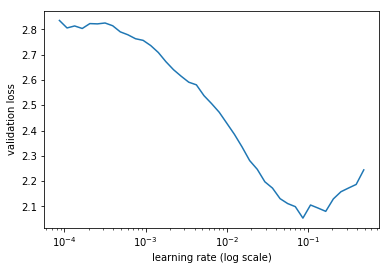

In [68]:
learn.sched.plot()

По графику видим, что нам подойдет скорость 0.01. Выставляем ее и обучаем нашу модель 2 эпохи при `precompute = True`

In [69]:
learn.fit(1e-2, 2)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.101196   0.622346   0.792157  
    1      0.801565   0.529178   0.811765                                                                              


[array([0.52918]), 0.811764706583584]

Отключаем `precompute`. И обучаемся еще 5 эпох с использованием `SGDR`.

In [70]:
learn.precompute = False

In [71]:
learn.fit(1e-2, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.641666   0.538438   0.823529  
    1      0.550723   0.476378   0.835294                                                                              
    2      0.51762    0.410786   0.862745                                                                              
    3      0.461065   0.396195   0.862745                                                                              
    4      0.464116   0.447034   0.854902                                                                              


[array([0.44703]), 0.8549019612518012]

Получаем небольшое улучшение. Теперь разморозим все слои и обучим нашу модель с помощью дифференциальных скоростей. Добавим умножение длины цикла в `.fit()`

In [75]:
learn.unfreeze()

In [76]:
lr=np.array([1e-4, 1e-3, 1e-2])

In [77]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.737551   1.036015   0.709804  
    1      1.225216   0.654693   0.811765                                                                              
    2      0.847301   0.492751   0.882353                                                                              
    3      0.801725   0.463763   0.894118                                                                              
    4      0.686041   0.371286   0.886275                                                                              
    5      0.598054   0.341955   0.890196                                                                              
    6      0.521073   0.318718   0.898039                                                                              


[array([0.31872]), 0.8980392161537619]

*val_loss* продолжает падать. А так же *trn_loss* больше, *val_loss*. Продолжим обучаться до переобучения.

In [80]:
learn.fit(lr, 3, cycle_len=2, cycle_mult=3)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.522116   0.364062   0.894118  
    1      0.51932    0.32211    0.905882                                                                              
    2      0.49572    0.317374   0.898039                                                                              
    3      0.475252   0.288566   0.909804                                                                              
    4      0.422268   0.260178   0.937255                                                                              
    5      0.388856   0.235589   0.937255                                                                              
    6      0.371236   0.247498   0.933333                                                                              
    7      0.332968   0.249258   0.92549                                                                            

[array([0.19371]), 0.9450980392156862]

Еще пару эпох.

In [82]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.209258   0.197401   0.952941  
    1      0.189917   0.190869   0.952941                                                                              
    2      0.235887   0.197188   0.952941                                                                              
    3      0.225504   0.230341   0.933333                                                                              
    4      0.245639   0.217497   0.937255                                                                              
    5      0.201085   0.213818   0.941176                                                                              
    6      0.165336   0.191745   0.94902                                                                               


[array([0.19175]), 0.9490196078431372]

Точность достигла 0.94902, что на 4% выше, чем у kNN. Максимум который я получал в эксперементах 0.97. Строим матрицу несоответствия.

In [83]:
preds = np.argmax(learn.predict_array(x_test), axis=1)

In [84]:
cm = confusion_matrix(y_test, preds)

[[27  0  0  0  0  0  0  0  1  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  1]
 [ 0  1  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  1  1 24  0  0  0]
 [ 0  0  0  0  1  0  0 30  1  0]
 [ 0  0  1  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  1  0  0  0 34]]


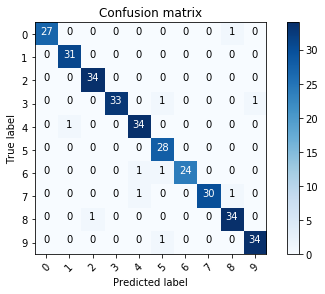

In [85]:
plot_confusion_matrix(cm, [i for i in range(10)])